<a href="https://colab.research.google.com/github/kaispace30098/Product-Daily-Keywords/blob/main/Copy_of_Product_Daily_Keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Please enter the keywords for tweets from today!

In [ ]:

inputtext = "Air Fryer" #@param {type:"string"}
import tweepy
import csv
import pandas as pd
import wordcloud
from wordcloud import WordCloud
#Final word cloud after all the cleaning and pre-processing
import matplotlib.pyplot as plt
####input your credentials here
import random
import nltk
#from nltk import word_tokenize, FreqDist
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#from nltk.tokenize import TweetTokenizer
#import re, string, unicodedata
from nltk.tokenize import word_tokenize
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
!pip install tweet-preprocessor==0.4.0
import preprocessor as p  
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


#####United Airlines
# Open/Create a file to append data
csvFile = open('ua.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)
mylist=[]
mylist2=[]
for tweet in tweepy.Cursor(api.search,tweet_mode='extended',q=inputtext,count=300,
                            lang="en").items(300):
    a = api.get_status(tweet.id, tweet_mode='extended')
    mylist.append(a.full_text)
    mylist2.append(tweet.created_at)

    print (tweet.created_at,a.full_text)
df1=pd.DataFrame()
df1['tweet']=mylist
df1['time']=mylist2
    
df1['tweet']=df1['tweet'].apply(str)    


2022-02-24 04:09:22 I be wanting to put everything in the air fryer 😂
2022-02-24 04:09:21 @kittenboy94 Mmmm now I want nugfies too. I'll make some in the air fryer with a bit of fries too.
2022-02-24 04:06:42 Maybe I can put these chickens in the air fryer.
2022-02-24 04:06:27 3.  Edifier X2 True Wireless Bluetooth Earbuds with Light Weight Design Built In Mic IP54 Touch Control TWS 
Get it on Shopee now! https://t.co/1RnnzuDQJB

4. MMX Kelen Munoz Air Fryer KM Cook Easy - Red/Black (3L) KMAF18R 
Get it on Shopee now! https://t.co/cAXdPIgUC4
2022-02-24 04:06:09 RT @55mmbae: If you’re needing any air fryer recipe ideas, check out my ebook with 25 air fryer recipes! https://t.co/9WpX2QHCzr https://t.…
2022-02-24 04:05:31 @Sinfulskin2 new Galantz microwave that is ALSO an air fryer AND can roast AND bake and it's like magic :D
2022-02-24 04:05:24 RT @55mmbae: Air fryer hot honey salmon 🐟 https://t.co/zNLrEivrTa
2022-02-24 04:05:07 RT @55mmbae: Air fryer hot honey salmon 🐟 https://t.co/zNL

In [ ]:

#import preprocessor as p#forming a separate feature for cleaned tweets
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.MENTION,  p.OPT.SMILEY)
for i in range(0,len(mylist)):

    df1.loc[i,'tweetclean'] = p.clean(df1.loc[i,'tweet'])

In [ ]:
#Sentences to a Long String
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

allwords=listToString(df1['tweetclean'])

In [ ]:
import string
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

de_punc_string=remove_punctuation(allwords)

In [ ]:
lowercase_str=de_punc_string.lower()

In [ ]:
nltk.download
nltk.download('punkt')
from nltk.tokenize import word_tokenize

token_list=word_tokenize(lowercase_str)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
inputtexts=word_tokenize(inputtext)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
for i in range(0,len(inputtexts)):
  stopwords.append(inputtexts[i].lower())
  stopwords.append('rt')


def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
nonstopped_list=remove_stopwords(token_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
inputtexts[0]

'Air'

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer_func=WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [lemmatizer_func.lemmatize(word) for word in text]
  return lemm_text
lemm_list=lemmatizer(nonstopped_list)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


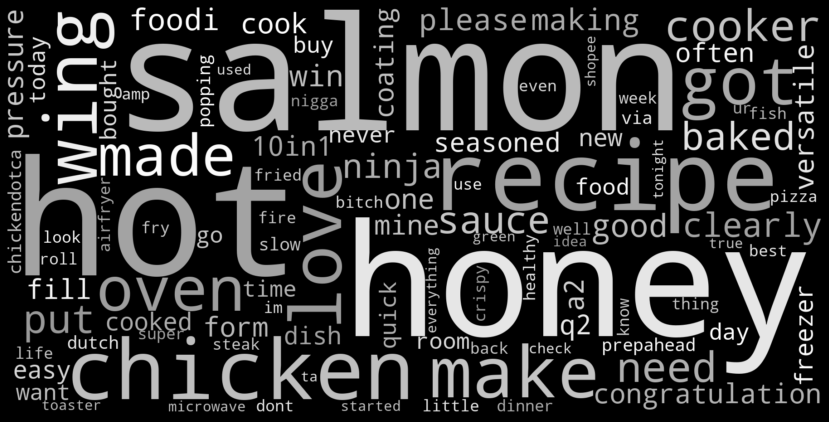

In [ ]:
wordcloud = WordCloud(width=1800, height=900,color_func=grey_color_func,collocations=False,max_words=100).generate(listToString(lemm_list))
plt.figure( figsize=(15,7.5),facecolor='k' )
plt.axis("off")
plt.imshow(wordcloud,interpolation='bilinear')


In [ ]:
#@title Download the tweets
from google.colab import files
df1.to_csv('tweets.csv',index=False) 
files.download('tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>